# `map_to_regions`
Maps pore values from a network onto the image from which it was extracted

In [1]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt

ws = op.Workspace()
ws.settings['loglevel'] = 50
np.random.seed(10)
ps.visualization.set_mpl_style()

## `Create image and extract network`

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/81 [00:00<?, ?it/s]

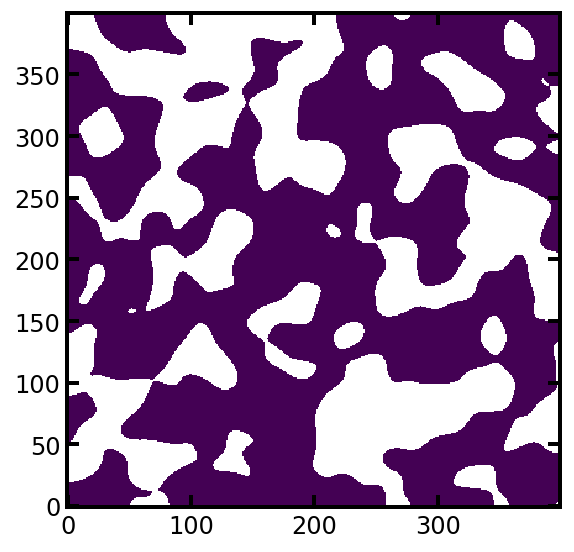

In [2]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6)
ps.imshow(im);
snow_output = ps.networks.snow2(im, voxel_size=1)
pn = op.io.network_from_porespy(snow_output.network)

## Plot the pore network

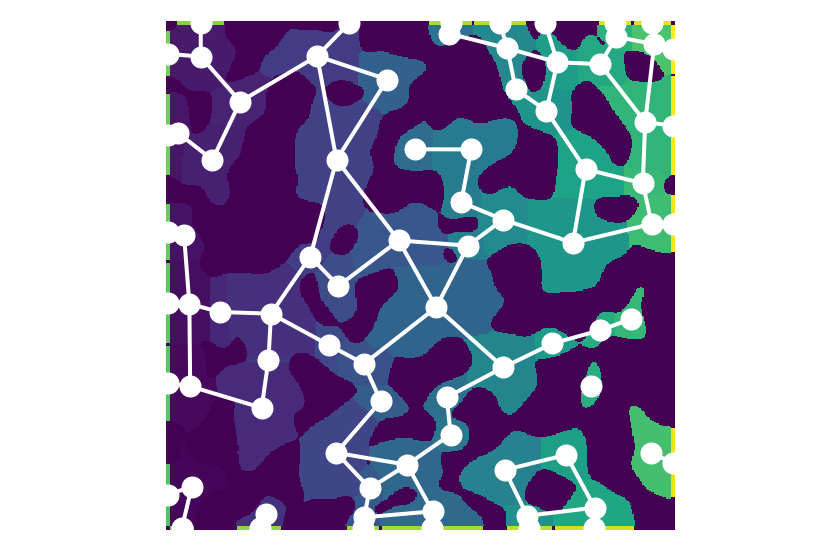

In [3]:
fig, ax = plt.subplots()
op.visualization.plot_connections(pn, c='w', linewidth=2, ax=ax)
op.visualization.plot_coordinates(pn, c='w', s=100, ax=ax)
plt.imshow(snow_output.regions.T, origin='lower')
plt.axis('off');

Now assign some values to the network:

In [4]:
pn['pore.values'] = np.random.rand(pn.Np)

And now assign these values to the image regions:

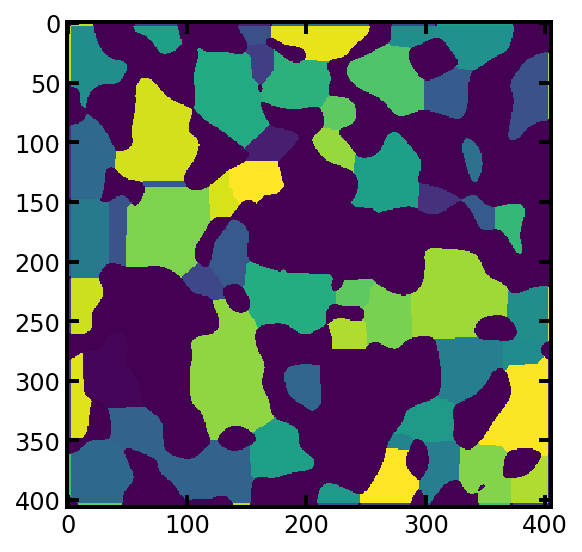

In [6]:
reg = ps.networks.map_to_regions(regions=snow_output.regions.T, values=pn['pore.values'])
plt.imshow(reg, origin='lower');